In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

In [3]:
csv_file = 'C:/Users/Ashrit/Desktop/Long Short Hair Identification/Hair_length_model/hair_length_.csv'
data = pd.read_csv(csv_file, names=['filename', 'label'])

In [4]:
# Paths to the images folder
image_folder = 'C:/Ashrit/Dataset_1/hairdata_1'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    validation_split=0.2  # Split 20% for validation
)

In [6]:
# For training data
train_generator = datagen.flow_from_directory(
    'C:/Ashrit/Dataset_1/hairdata_1',  # Path to dataset directory
    target_size=(128, 128),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',  # Or 'binary' if binary classification
    subset='training'  # Specify training subset
)


Found 16697 images belonging to 2 classes.


In [7]:
# For validation data
val_generator = datagen.flow_from_directory(
    'C:/Ashrit/Dataset_1/hairdata_1',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

Found 4173 images belonging to 2 classes.


In [8]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Binary classification (long/short)
])

c:\Users\Ashrit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

c:\Users\Ashrit\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 256s 487ms/step - accuracy: 0.8328 - loss: 0.3510 - val_accuracy: 0.9593 - val_loss: 0.1085
Epoch 2/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 265s 507ms/step - accuracy: 0.9600 - loss: 0.1067 - val_accuracy: 0.9619 - val_loss: 0.1083
Epoch 3/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 273s 523ms/step - accuracy: 0.9705 - loss: 0.0761 - val_accuracy: 0.9717 - val_loss: 0.0730
Epoch 4/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 265s 508ms/step - accuracy: 0.9788 - loss: 0.0575 - val_accuracy: 0.9736 - val_loss: 0.0850
Epoch 5/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 260s 499ms/step - accuracy: 0.9815 - loss: 0.0505 - val_accuracy: 0.9703 - val_loss: 0.0887
Epoch 6/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 260s 498ms/step - accuracy: 0.9859 - loss: 0.0423 - val_accuracy: 0.9712 - val_loss: 0.0792
Epoch 7/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 261s 499ms/step - accuracy: 0.9884 - loss: 0.0308 - val_accuracy: 0.9811 - val_loss: 0.0648
Epoch 8/10
522/522 ━━━━━━━━━━━━━━━━━━━━ 265s 508ms/step - accuracy: 0.9881 -

In [11]:
# Save the trained model
model.save('C:/Users/Ashrit/Desktop/Long Short Hair Identification/Models/hair_length_predict_model.keras')

print("Model training completed and saved as 'hair_length_predict_model.keras'.")

Model training completed and saved as 'hair_length_predict_model.keras'.


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Get predictions on the validation set
val_generator.reset()  # Reset generator before predictions
predictions = model.predict(val_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get class with highest probability
true_classes = val_generator.classes  # True labels
class_labels = list(val_generator.class_indices.keys())  # Class labels


131/131 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step


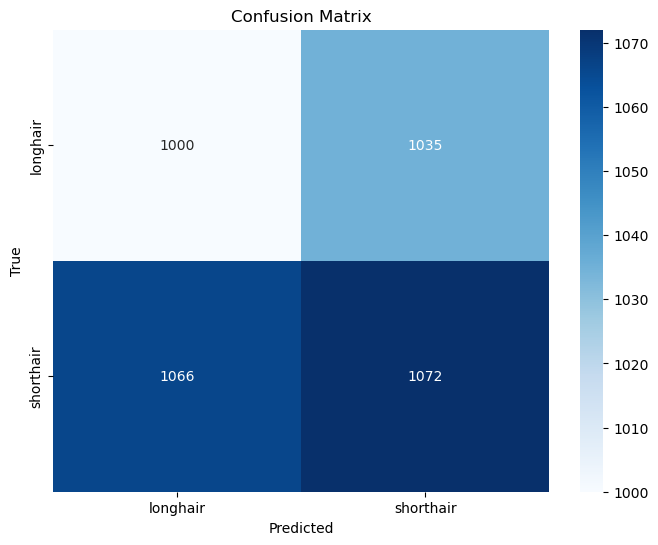

In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

    longhair       0.48      0.49      0.49      2035
   shorthair       0.51      0.50      0.51      2138

    accuracy                           0.50      4173
   macro avg       0.50      0.50      0.50      4173
weighted avg       0.50      0.50      0.50      4173

